Question 1: Which districts have the highest number of arrests and crime?

In [1]:
%matplotlib inline

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import csv file
crimes_data = pd.read_csv('./Resources/Crimes_2015toPresent.csv')
crime_years = crimes_data.sort_values(by=['District',"Primary Type", "Year"], ascending=True)
crime_years = crime_years.set_index(["District", "Primary Type", "Arrest"])

#crime_years = crime_years.set_
crime_years

Date  IUCR  \
District Primary Type               Arrest                                 
1.0      ARSON                      True    10/26/2015 07:06:00 PM  1090   
                                    True    10/26/2015 06:58:00 PM  1090   
                                    True    11/18/2015 09:18:00 PM  1025   
                                    True    01/25/2016 09:00:00 PM  1090   
         ASSAULT                    True    12/04/2015 09:15:00 AM  0560   
...                                                            ...   ...   
31.0     OFFENSE INVOLVING CHILDREN True    04/24/2015 12:00:00 AM  1752   
                                    False   03/13/2016 12:00:00 PM  1752   
                                    False   06/01/2017 12:01:00 AM  1752   
         THEFT                      False   09/01/2016 02:00:00 PM  0810   
                                    False   10/08/2016 01:05:00 AM  0890   

                                                              Description  \
District Primary Type               Arrest                                  
1.0      ARSON                      True                    ATTEMPT ARSON   
                                    True                    ATTEMPT ARSON   
                                    True                       AGGRAVATED   
                                    True                    ATTEMPT ARSON   
         ASSAULT                    True                           SIMPLE   
...                                                                   ...   
31.0     OFFENSE INVOLVING CHILDREN True    AGG CRIM SEX ABUSE FAM MEMBER   
                                    False   AGG CRIM SEX ABUSE FAM MEMBER   
                                    False   AGG CRIM SEX ABUSE FAM MEMBER   
         THEFT                      False                       OVER $500   
                                    False                   FROM BUILDING   

                                                                       Location Description  \
District Primary Type               Arrest                                                    
1.0      ARSON                      True                                  CONSTRUCTION SITE   
                                    True                                              OTHER   
                                    True                                         RESTAURANT   
                                    True                                          APARTMENT   
         ASSAULT                    True                                               BANK   
...                                                                                     ...   
31.0     OFFENSE INVOLVING CHILDREN True                                          RESIDENCE   
                                    False                                         RESIDENCE   
                                    False                                         RESIDENCE   
         THEFT                      False                    PARKING LOT/GARAGE(NON.RESID.)   
                                    False   AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA   

                                           FBI Code  Year   Latitude  \
District Primary Type               Arrest                             
1.0      ARSON                      True         09  2015  41.885874   
                                    True         09  2015  41.883224   
                                    True         09  2015  41.883778   
                                    True         09  2016  41.853931   
         ASSAULT                    True        08A  2015  41.875078   
...                                             ...   ...        ...   
31.0     OFFENSE INVOLVING CHILDREN True         20  2015  41.968013   
                                    False        17  2016  41.968013   
                                    False        20  2017  41.968013   
         THEFT                      False  

In [4]:
arrests_df = crimes_data[crimes_data["Arrest"] == True]
arrest_counts = arrests_df["District"].value_counts()
arrest_counts = pd.DataFrame(arrest_counts).reset_index()
arrest_counts.columns = ["District", "Number of Arrests Made"]
arrest_counts

,District,Number of Arrests Made
0,11.0,28796
1,6.0,15806
2,7.0,15426
3,10.0,14743
4,4.0,13049
5,5.0,11768
6,25.0,11747
7,15.0,11708
8,8.0,11684
9,1.0,10254


In [5]:
# Count the occurrences of each district number in original data frame
district_counts = crimes_data["District"].value_counts().reset_index()
# Display the district counts
district_counts = pd.DataFrame(district_counts)
district_counts.columns = ["District", "Number of Crime Occurrences"]
district_counts


,District,Number of Crime Occurrences
0,25.0,57332
1,12.0,54080
2,19.0,48723
3,18.0,43753
4,11.0,42273
5,15.0,41019
6,14.0,39289
7,24.0,23799
8,22.0,20444
9,20.0,18515


In [6]:
District_df = district_counts.merge(arrest_counts)
#District_df = District_df.set_index("District")
District_df = District_df.sort_values(by ="District", ascending = True)
District_df["Crimes Reported"]= District_df["Number of Crime Occurrences"]-District_df["Number of Arrests Made"]
District_df = District_df[["District","Crimes Reported","Number of Arrests Made"]]
District_df

,District,Crimes Reported,Number of Arrests Made
17,1.0,0,10254
20,2.0,0,7247
19,3.0,0,9806
14,4.0,0,13049
15,5.0,0,11768
11,6.0,0,15806
12,7.0,0,15426
16,8.0,0,11684
18,9.0,0,10096
13,10.0,0,14743


<function matplotlib.pyplot.show(close=None, block=None)>

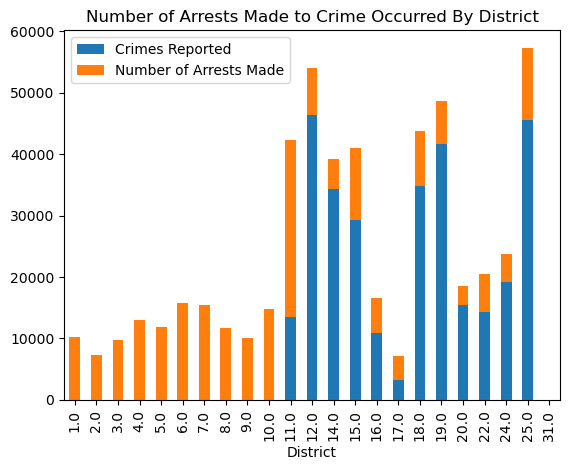

In [8]:
# Stacked bar chart for Arrest:Crime by District
District_df.plot (x="District", kind="bar", stacked=True, title="Number of Arrests Made to Crime Occurred By District")
df_total = District_df["Number of Arrests Made"] + District_df["Crimes Reported"]
df_rel = District_df[District_df.columns[1:]].div(df_total, 0) * 100

plt.show

Special note: District 31 is 14 arrests of a total 27 reported crimes 
Question to answer: Age of District? Location? Demographics? Primary Type?